In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="Set2")

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


Скоро весна и лето &mdash; идеальное время года для путешествий и прогулок на велосипедах. В крупных городах обычно развиты сети проката велосипедов или самокатов, предоставляющие удобный сервис. Одной из важных задач таких компаний является прогнозирование количества арендованных велосипедов в зависимости от времени года и погодных условий.

Рассмотрим датасет <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a> от компании <a target="_blank" href="https://www.capitalbikeshare.com/">Capital Bikeshare</a>, располагающей автоматизированными пунктами проката велосипедов. В датасете по дням записаны календарная информация и погодные условия, а также число прокатов в этот день. Цель &mdash; предсказать количество арендованных велосипедов по остальным характеристикам.

<img src="https://thetahat.ru/files/ad/main/3/bike1.jpeg">

Будем работать только со следующими признаками:
* `season`: время года: 1 &mdash; зима, 2 &mdash; весна, 3 &mdash; лето, 4 &mdash; осень;
* `mnth`: месяц от 1 до 12;
* `holiday`: является ли текущий день праздничным;
* `weekday`: день недели от 0 до 6;
* `workingday`: является ли текущий день рабочим или выходным;
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман);
* `temp`: температура в Цельсиях;
* `atemp`: температура по ощущениям в Цельсиях;
* `hum`: влажность воздуха;
* `windspeed`: скорость ветра;
* `cnt`: количество арендованных велосипедов в текущий день.

---

Скачайте данные, загрузите их с помощью `pandas` и разделите на обучающую и тестовую части в соотношении 4:1. Далее всю аналитику необходимо проводить только на обучающей части данных.

In [ ]:
df=pd.read_csv("data\day.csv", delimiter=",")
df.head(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\User\AppData\Local\Temp\ipykernel_17480\3916829724.py:1: SyntaxWarning: invalid escape sequence '\d'
  df=pd.read_csv("data\day.csv", delimiter=",")


In [8]:
features = [
    'season', 'mnth', 'holiday', 'weekday', 
    'workingday', 'weathersit', 'temp', 
    'atemp', 'hum', 'windspeed'
]

X = df[features] 
y = df['cnt'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_data = X_train.copy()
train_data['cnt'] = y_train

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 7e2346d718d374e3f957928b573e2a30 -->
#### 1. Визуальный анализ

Посмотрите по графикам, как *целевой признак зависит от остальных* и поймите характер этой зависимости. Старайтесь строить информативные графики, а из финального решения убирать те, которые не пригодились.

Какие признаки категориальные, а какие &mdash; вещественные? Учтите это при построении информативных графиков.

*Указание*. Среди признаков есть такие, значения которых как-то упорядочены, и их относительно небольшое количество. Чтобы понять, являются ли они категориальными, попробуйте понять, как с их значениями будут работать линейные модели. Иначе говоря, допустимо ли с точки зрения природы данных выполнять арифметические операции между *любыми* значениями этого признака, согласуется ли это со смыслом, который несет в себе данный признак?

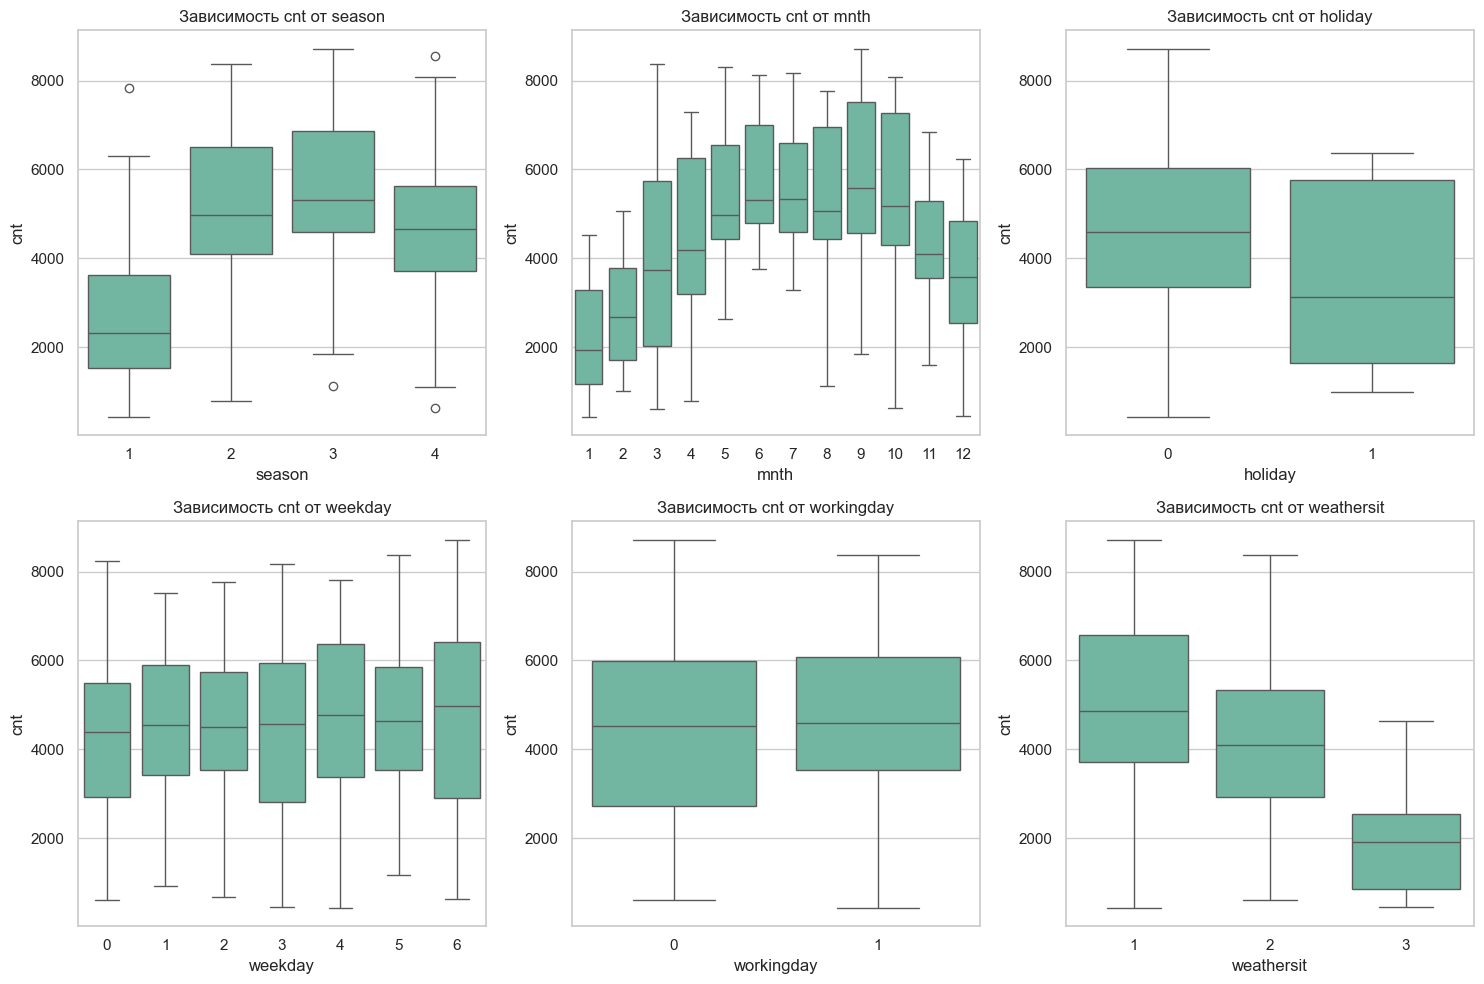

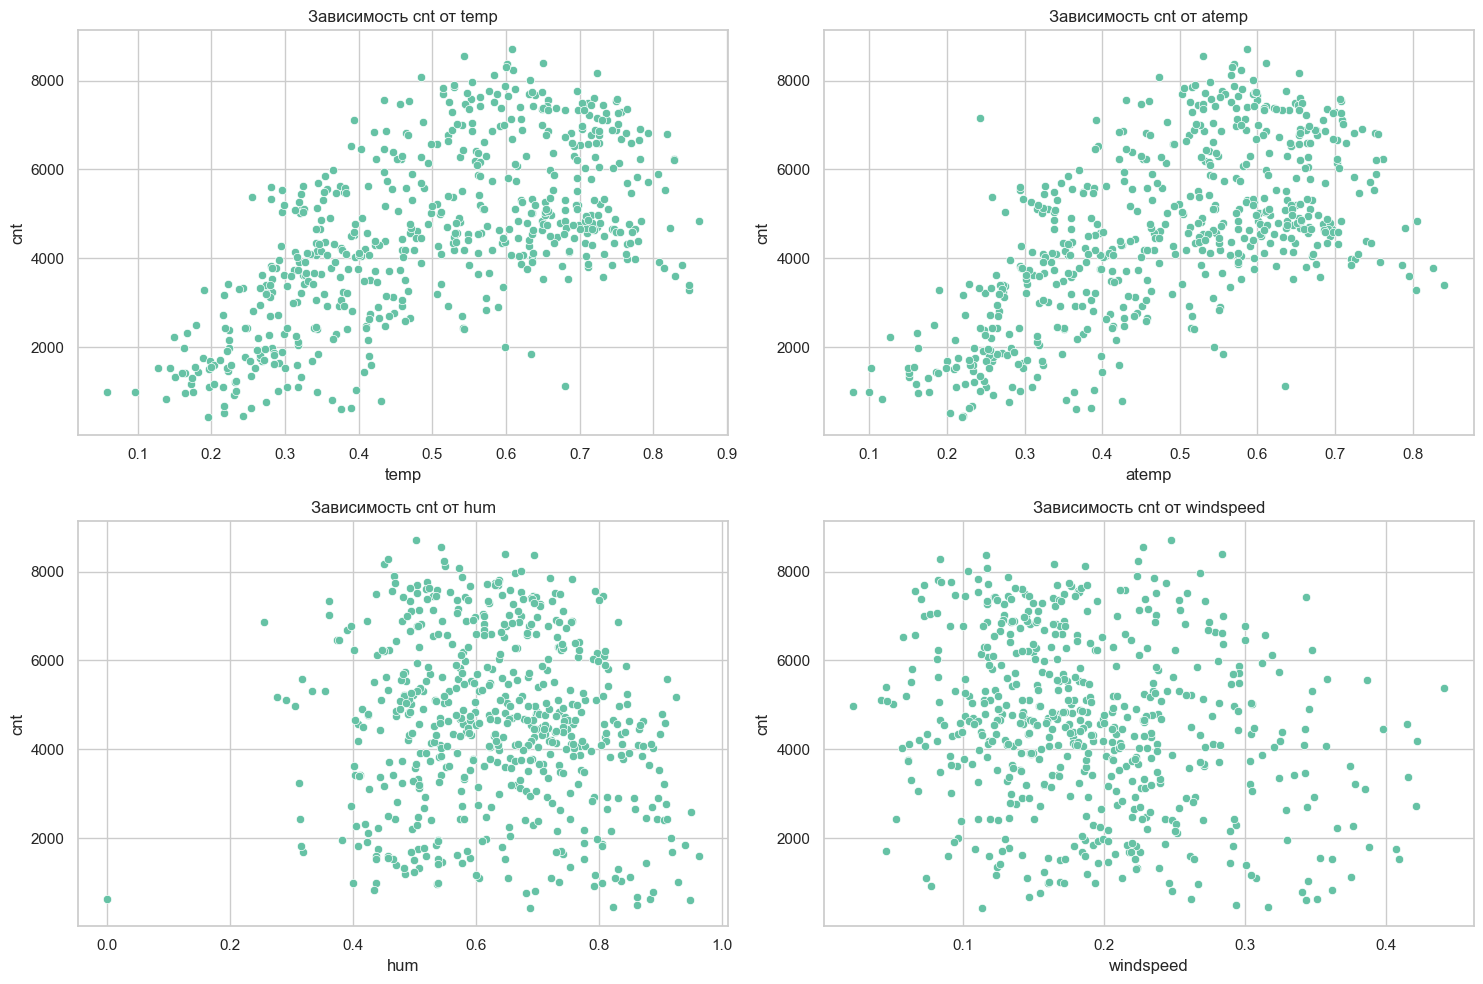

In [9]:
categorical_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
numerical_features = ['temp', 'atemp', 'hum', 'windspeed']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=feature, y='cnt', data=train_data)
    plt.title(f'Зависимость cnt от {feature}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=feature, y='cnt', data=train_data)
    plt.title(f'Зависимость cnt от {feature}')

plt.tight_layout()
plt.show()

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 4c1edb365b02e434e38deeb52b2096fa -->
Сделайте выводы по графикам. В частности, ответьте на следующие вопросы.
* Есть ли в данных явные выбросы, то есть точки, далеко находящиеся от основной массы точек?
* Стоит ли рассматривать какие-либо нелинейные функции от признаков? Не стоит придумывать сложные функции, достаточно рассмотреть $x^2$, $\log x$.



- Да, есть, это заметно на графиках cnt от temp и от atemp
- да, стоит, потому что на некоторых графиках присутсвует криволинейный характер 

**Выводы по графикам:** ...

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- e5fcb54a72af33e2c09b66124e63e5fc -->
#### 2. Подготовка данных

Опишите по шагам процедуру предобработки данных, которая будет включать работу с выбросами, преобразования вещественных и категориальных признаков, возможно, создание каких-либо новых признаков (посмотрите пример из лекции). То, как именно выполнять подготовку данных, является целым исскуством. Здесь нет "правильного" подхода, здесь есть метрика качества на тестовом множестве, которая в последствии оценит качество вашей модели.

*Обратите внимание, от того, насколько качественно вы проведете визуальный анализ и подготовку данных, будет зависеть качество вашей модели на следующих шагах.*

**Процедура предобработки данных:**

**a).** Работа с выбросами
- Визуально проанализировать графики, чтобы выявить явные выбросы.
- Рассмотреть возможность удаления наиболее очевидных выбросов.

**б).** Преобразование признаков
- Проанализировать распределение численных признаков, таких как "temp", "atemp", "hum", "windspeed"
- Для признаков с сильной асимметрией или тяжелыми хвостами применить логарифмическое преобразование.
- Для категориальных признаков использовать one-hot кодирование.

**в).**  Создание новых признаков
- На основе графиков и предметной области рассмотреть возможность создания простых нелинейных признаков, например, $temp^2$ или $\log(hum)$.

**г).**  Разделение данных
- Разделить исходный набор данных на обучающую и тестовую выборки.
- Убедиться, что распределение целевого признака и предикторов схожее в обеих выборках.
        
**д).**  Итеративная оптимизация
- Обучить простую модель (например, линейную регрессию) на обучающей выборке
- Оценить качество модели на тестовой выборке
- При необходимости вернуться на несколько шагов назад, и пересмотреть коректировку

Реализуйте данную процедуру.

c:\Users\User\OneDrive\Рабочий стол\pp\лаба 3\env\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


KeyError: "['log_temp', 'log_atemp', 'log_hum', 'temp_squared', 'temp_hum'] not in index"

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- c5124704b109dacbd9cf5647f50eb72c -->
#### 3. Обучение модели и ее анализ

Обучите линейную регрессию из `sklearn` на полученных данных и посмотрите на полученные оценки коэффициентов (в т.ч. свободный коэффициент).

In [ ]:
...

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 0e8e860f57fc7df75f236442f7206c78 -->
Посчитайте ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE. 

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать (например, сбои в работе сервиса) но в то же время выбросы вносят существенный вклад в значение метрики. Особенно стоит обратить на это внимание в случае высоких значений метрик.

In [ ]:
...

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 52266029600cdfda3b1cfce9e68f5c99 -->
Сделайте выводы.

**Выводы:**

...

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 00000000000000000000000000000000 -->
*Замечание.* Не расстраивайтесь, если у вас получится не очень хорошее качество, это нормально. Вы провели только небольшую предобработку данных и обучили *простую* модель. Более сложные методы обработки данных и обучения ждут вас впереди. Главное &mdash; с чего-то начать!

<img src="https://thetahat.ru/files/ad/main/3/bike2.png">